In [1]:
# Classification with SVM

In [26]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import pandas as pd

import seaborn as sns; sns.set(style="ticks", color_codes=True)

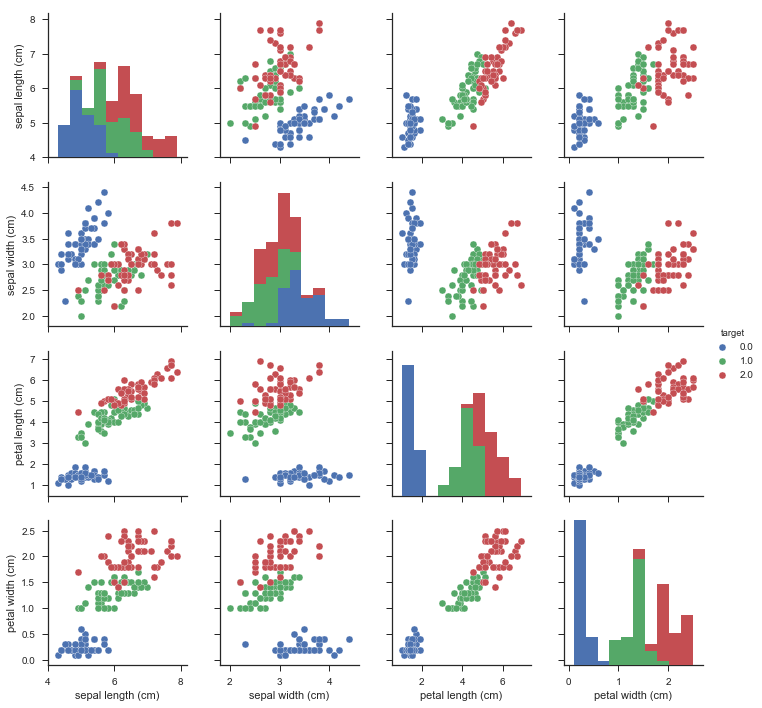

In [30]:
iris_data = datasets.load_iris()

iris_df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                       columns= iris_data['feature_names'] + ['target'])

#iris = sns.load_dataset("iris")
#sns.pairplot(iris_df)
#sns.pairplot(iris_df, vars=["sepal width (cm)", "sepal length (cm)"], hue="target")
sns.pairplot(iris_df, vars=iris_data['feature_names'], hue="target")


In [9]:
X0 = iris_data['data'][:,0] #sepal length in cm
X1 = iris_data['data'][:,1] #sepal width in cm
X2 = iris_data['data'][:,2] #petal length in cm
X3 = iris_data['data'][:,3] #petal width in cm

In [11]:
X = iris_data['data'][:,(2,3)]  #length, width
y = (iris_data['target'] == 2).astype(np.float64)

Text(0.5,1,'Incorrect Number of Blobs')

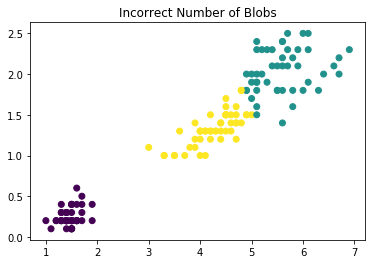

In [15]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=3).fit_predict(X)
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(111)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

In [ ]:
plt.show()

In [ ]:
%matplotlib inline